
___
Team Member Names
- Name 1: Matthew D. Cusack
- Name 2: Tim Cabaza
- Name 3: Amy Adyanthaya

<a id="top"></a>
________
# Clustering
____

## Contents
* <a href="#Imports">Dependency and Data Imports</a>
* <a href="#DataPrep">Data Preparation</a>
* <a href="#BusinessUnderstanding">Business Understanding</a>
* <a href="#DataUnderstanding">Data Understanding</a>
* <a href="#ModelEval">Modeling and Evaluation</a>
    * <a href="#OptionA">Option A: Cluster Analysis</a>
    * <a href="#OptionB">Option B: Association Rule Mining</a>
    * <a href="#OptionC">Option C: Collaborative Filtering</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>
_______

___
___
<a href="#top">Back to Top</a>
<a id="Imports"></a>
## Imports

In [58]:
#1

# Load Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this import allows you to standardize your data, scaling so that all features have a mean of zero and a standard deviation of 1. 
from sklearn.preprocessing import StandardScaler

# for option A: Clustering methods
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# for option B: association rule mining
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

# for option C:
# import graphlab as gl


In [2]:
#2

# file path
file_path = "../1 - Visualization and Data Preprocessing/Data/ONPClean2.csv" # previously cleaned
# file_path = '../1 - Visualization and Data Preprocessing/Data/OnlineNewsPopularity.csv' # unclean

# Load the dataset
df = pd.read_csv(file_path)

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)
df.head()

,url_name,date,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_shares,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,amazon-instant-video-browser/,2013-01-07,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,6.386879,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,reeddit-reddit/,2013-01-07,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,7.170888,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,rage-comics-dying/,2013-01-07,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,7.003974,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,power-matters-alliance-organization/,2013-01-07,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,7.378384,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,polaroid-android-camera/,2013-01-07,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.783641,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


___
___
<a href="#top">Back to Top</a>
<a id="DataPrep"></a>
## Data Preperation
To Do:

    Remove Outliers
    Scale Data
    Remove non-independent variables

In [17]:
#3

# drop certain columns
df1 = df.drop('url_name', axis=1) # was a string and not helpful
df1 = df1.drop('date', axis=1) # datetime change didn't work.
df1 = df1.drop('log_shares', axis=1) # not as useful

# Factor columns that need it for certain models
# Factor the `news_category` column for other two tasks.
df1 = pd.get_dummies(df1, columns=['news_category'], drop_first=False)

# Factor the `day_of_week` column for other two tasks.
df1 = pd.get_dummies(df1, columns=['day_of_week'], drop_first=False)

# drop Na's
df1.dropna()

df1.head()
df1.columns

Index(['timedelta', 'n_tokens_title', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_avg_min',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'year', 'month',
       'log_n_tokens_content', 'log_num_hrefs', 'log_num_self_hrefs',
       'log_num_imgs', 'log_num_videos', 'log_kw_max_min', 'log_kw_min_max',
       'log_kw_avg_avg', 'log_self_reference_min_shares',
       'log_self_reference_max_shares

In [13]:
#4

# Scale the features in the training and testing sets using standard scalar.
scaler = StandardScaler()

df1_std = scaler.fit_transform(df1)
print(df1_std)

[[ 1.75788035  0.75744723  0.03277187 ... -0.47376097 -0.47866363
  -0.48045406]
 [ 1.75788035 -1.13469127  0.07768129 ... -0.47376097 -0.47866363
  -0.48045406]
 [ 1.75788035 -0.66165665  0.017152   ... -0.47376097 -0.47866363
  -0.48045406]
 ...
 [-1.61341404  0.75744723 -0.0094557  ... -0.47376097  2.08914975
  -0.48045406]
 [-1.61341404  2.17655111 -0.01191665 ... -0.47376097  2.08914975
  -0.48045406]
 [-1.61808342 -0.18862202  0.04367671 ... -0.47376097 -0.47866363
   2.08136446]]


___

___
___
<a href="#top">Back to Top</a>
<a id="BusinessUnderstanding"></a>
## Business Understanding (10 points).
    Describe the purpose of the data set you selected (i.e., why was this data
    collected in the first place?). 
    
    How will you measure the effectiveness of a good algorithm? 
    
    Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?


____
___
<a href="#top">Back to Top</a>
<a id="DataUnderstanding"></a>
## Data Understanding (20 points total)




    [10 points]
        Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 
----


 
        Verify data quality: 
            Are there missing values? The dataset does not have any missing values. 
            Duplicate data? Outliers? Only two features were providing duplicate data and were dropped;  log_shares which is a duplicate of the feature shares just in a different form. Log_shares was dropped since it was not useful to the model and the data was already captured with the feature shares. 
            Are those mistakes? There were no mistakes in the dataset, however there were some features that were deemed useless to the model; url_name and date. 
            How do you deal with these problems? We dealt with these issues by using our domain knowledge and understanding of the dataset to eliminate features that were either duplicates of another feature or provided no predictive value to our model. 
----


    [10 points]
        Visualize the any important attributes appropriately.
        Important: Provide an interpretation for any charts or graphs.

In [5]:
# Add Visualizations of important features and provide explanations of visualizations -- we can take this from our older files. 

___
___
<a href="#top">Back to Top</a>
<a id="ModelEval"></a>
## Modeling and Evaluation (50 points total)
    Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
    the data you have chosen and use visualizations of the results to explain the performance and
    expected outcomes whenever possible. Guide the reader through your analysis with plenty of
    discussion of the results.


___
<a href="#top">Back to Top</a>
<a id="OptionA"></a>

## Option A: Cluster Analysis

    Perform cluster analysis using several clustering methods

    How did you determine a suitable number of clusters for each method?

    Use internal and/or external validation measures to describe and compare the
    clusterings and the clusters (some visual methods would be good).

    Describe your results. What findings are the most interesting and why?

In [71]:
# 5 Tim attempt 


# init used to initialize the cluster centroids - default is random but here we are choosing kmeans++ because it leads to faster convergence, n_init is the number of times to run the KMeans algo with different initializations - the default is 10 
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=1).fit(df1_std)
# three clusters from zero to two -- here we print our cluster memberships
print("Cluster memberships:\n{}".format(kmeans.labels_))
# running the predict on the training set returns the same result as labels_

print(kmeans.predict(df1_std))

# Print the cluster labels and cluster centroids
display(kmeans.predict(df1_std))
display(kmeans.cluster_centers_)

Cluster memberships:
[5 5 0 ... 8 2 1]
[5 5 0 ... 8 2 1]


array([5, 5, 0, ..., 8, 2, 1], dtype=int32)

array([[ 1.56906449e+00, -3.20077287e-01,  1.06803820e-02,
         1.79233208e-01, -5.87580948e-02,  2.67538755e+00,
         2.69949339e-01, -2.46497774e+00, -1.45535259e+00,
        -5.17285347e-01, -2.64805607e-01, -3.59453821e-02,
         2.01644142e-01, -1.01938337e-02, -2.74326300e-02,
        -2.29355513e-01,  8.53478300e-02,  8.51026099e-02,
         1.60449754e-01,  3.12592976e-01,  2.59743187e-03,
         2.47655422e-01, -1.10075873e-01,  3.53415840e-02,
         1.34565001e-01, -4.39525031e-02,  9.90555548e-02,
         2.01166094e-01, -9.73433917e-02, -1.49360519e-02,
         9.32961200e-02, -2.41347943e-02,  6.57220889e-03,
        -2.98629782e-02, -1.07974464e+00, -1.35944144e+00,
        -6.62575732e-02, -3.60080889e-01, -1.14462442e+00,
        -5.27722599e-01, -2.88499648e-01,  1.28414668e-01,
        -5.34050070e-01, -8.87166334e-01, -2.01082551e+00,
        -2.01298667e+00, -2.03026707e+00,  2.24588071e-01,
        -1.79279350e-01,  1.30075086e-01,  4.47824470e-0

Text(0, 0.5, 'Feature 1')

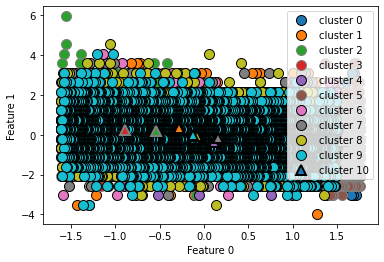

In [73]:
# 6 Tim attempt 

import mglearn 
mglearn.discrete_scatter(df1_std[:, 0], df1_std[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8 , 9],markers='^', markeredgewidth=2)
plt.legend(["cluster 0", "cluster 1", "cluster 2", "cluster 3", "cluster 4", "cluster 5", "cluster 6", "cluster 7", "cluster 8", "cluster 9", "cluster 10"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# The cluster centers are stored in the cluster_centers_attribute plotted as triangles found by kmeans with 3 clusters 

In [74]:
# 7 Tim Attempt 

# It is also possible to get an even more expressive representation of the data by using the distances to each of the cluster centers as features. This can be accomplished using the transform method of kmeans
distance_features = kmeans.transform(df1_std)
print("Distance feature shape: {}".format(distance_features.shape)) 
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (39644, 10)
Distance features:
[[17.68348794 18.56393737 18.72356658 ... 18.79522335 18.94207394
  18.80702395]
 [17.99055776 19.35059724 18.95394255 ... 19.1578026  18.53076525
  19.21348632]
 [17.6652425  19.63066533 19.44254794 ... 18.72344922 19.75422613
  19.83963762]
 ...
 [ 9.23154262  6.55782027  6.55673348 ...  7.1214399   4.51593138
   6.65527988]
 [10.06298894  7.52860336  5.82289252 ...  7.75003056  7.24862271
   7.5695836 ]
 [10.64431177  6.58160231  8.46791396 ...  8.80488809  8.31901657
   7.99394207]]


In [75]:
# 8 Tim attempt

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = kmeans.labels_

# The silhouette score measures the cohesion within clusters and the separation between clusters. It ranges from -1 to 1, with a higher score indicating a better model. 
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df1_std, labels))

# Calculate the Calinski-Harabasz index
# The Calinski-Harabasz index measures the compactness of clusters and the distance between clusters. It ranges from 0 to infinity, with a higher score indicating a better model.
calinski_harabasz_score = calinski_harabasz_score(df1_std, kmeans.labels_)
# Print the scores
print("Calinski-Harabasz index:", calinski_harabasz_score)

# Calculate the Davies-Bouldin index
# The Davies-Bouldin index measures the ratio of the within-cluster scatter to the between-cluster separation. It ranges from 0 to infinity, with a lower score indicating a better model.
davies_bouldin_score = davies_bouldin_score(df1_std, kmeans.labels_)
print("Davies-Bouldin index:", davies_bouldin_score)

# https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c

Silhouette Coefficient: 0.102
Calinski-Harabasz index: 1878.7650451350678
Davies-Bouldin index: 2.507365845115987


In [80]:
# 9 Tim Attempt 

# Agglomerative Clustering Refers to a collection of clustering algo that all build upon the same principles: the algo starts by declaring each point in its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied ( it has no predict method use fit_predict instead)-- quote from book 

# linkage choice is ward - the default -- ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized. 

# other linkage options to use if ward doesnt work even thought it should work on most datasets, if the clusters have very dissimilar numbers of members meaning one is much bigger than the others then we can try these options - average: merges the two clusters that have the smallest avg distance between all their points, complete: aka maximum linkage merges the two clusters that have the smallest maximum distance between points 

model = AgglomerativeClustering(linkage='ward', n_clusters=10).fit(df1_std)
mglearn.plots.plot_agglomerative_algorithm
assignment = model.fit_predict(df1_std)


Text(0, 0.5, 'Feature 1')

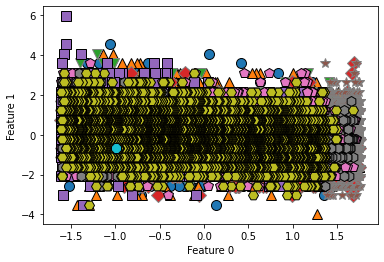

In [82]:
# 10 Tim Attempt 

mglearn.discrete_scatter(df1_std[:, 0], df1_std[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


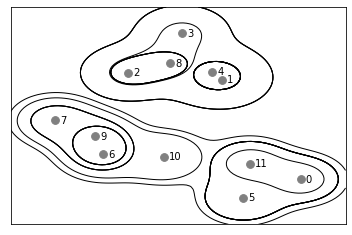

In [83]:
# 11 Tim Attempt 

mglearn.plots.plot_agglomerative()

    Hierarchical cluster assignment (shown as lines) generated with agglomerative clustering, with numbered data point. Here we are looking at all possible clusters jointly, the above visual shows an overlay of all the possible clustering providing insight into how each cluster breaks up into smaller clusters. This visual however only works when we have two features (relies on two dimensional nature of the data), when we have more than two features we must use a dendrogram that can handle multidimensional datasets.


Text(0, 0.5, ' Cluster Distance')

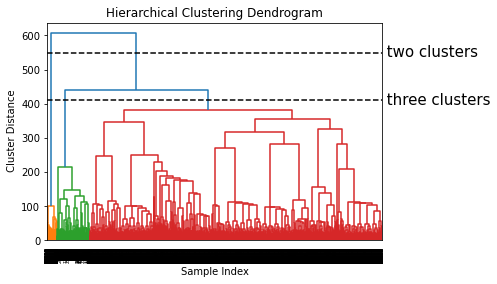

In [87]:
# 12 Tim Attempt 

# While this visualization provides a very detailed view of the hierarchical clustering, it relies on the two-dimensional nature of the data and therefore cannot be used on datasets that have more than two features. There is, however, another tool to visualize hierarchical clustering, called a dendrogram, that can handle multidimensional datasets.

linkage_array = ward(df1_std)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [550, 550], '--', c='k')
ax.plot(bounds, [410, 410], '--', c='k')
ax.text(bounds[1], 550, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 410, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel(' Cluster Distance')


    Dendogram of the clustering shown above with lines indicating splits into two and three clusters. The y-axis specifies when the agglomerative algo two clusters are merged and the length of each branch shows how far apart the merged clusters are 

In [ ]:
# 13 Tim Attempt 

model = DBSCAN(eps=0.15, min_samples=10).fit(data)

In [ ]:
# 14 Tim Attempt 

/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


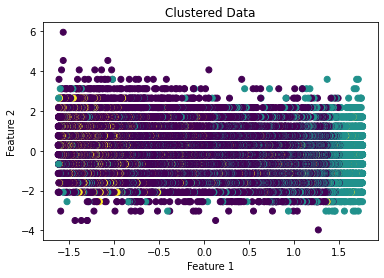

In [16]:
#15

# Choose a clustering algorithm (kmeans) - kmeans object with 3 clusters 
kmeans = KMeans(n_clusters=3)

# Cluster the data
kmeans.fit(df1_std)

# Get the cluster labels
labels = kmeans.labels_

plt.scatter(df1_std[:, 0], df1_std[:, 1], c=labels)
plt.xlabel('Feature 1') # time delta 
plt.ylabel('Feature 2') # Number of tokens in a title 
plt.title('Clustered Data')
plt.show()


    The scaled dataset is clustered into three clusters and colored according to the label. 

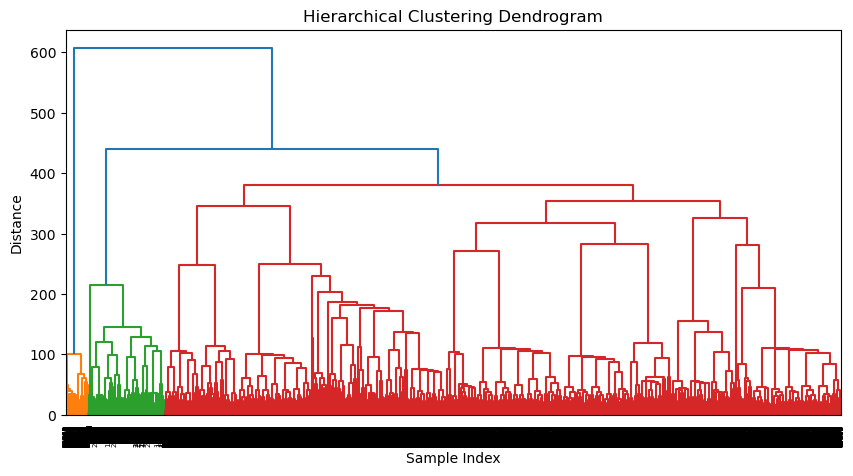

In [8]:
#16

# Choose a clustering algorithm (Hierachical Clustering)

# Perform hierarchical clustering
linkage_matrix = linkage(df1_std, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

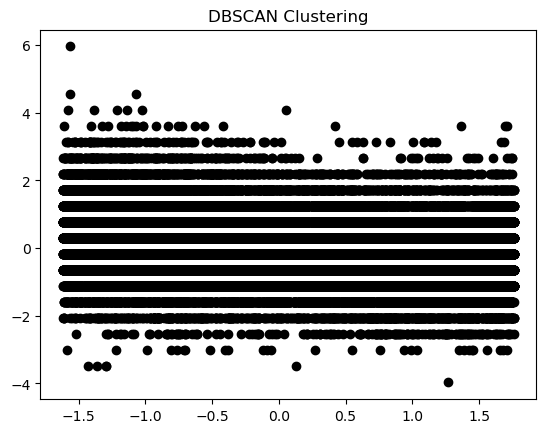

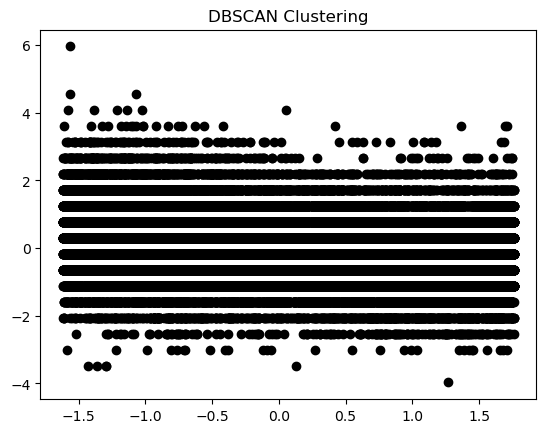

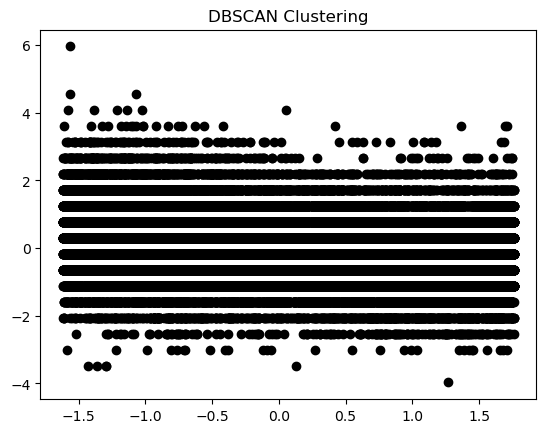

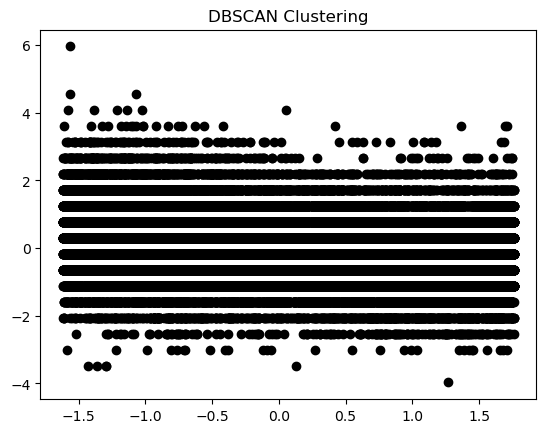

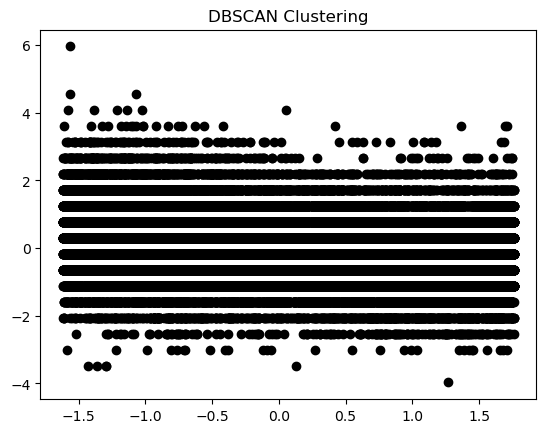

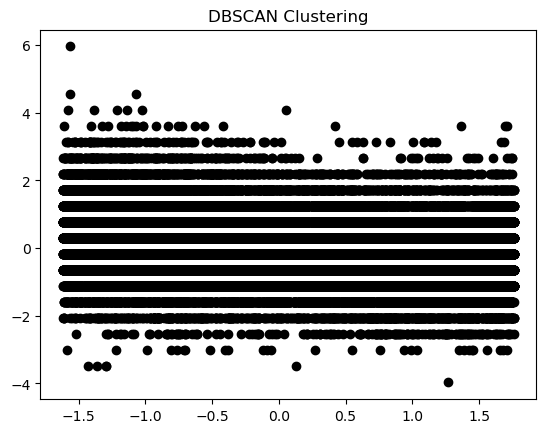

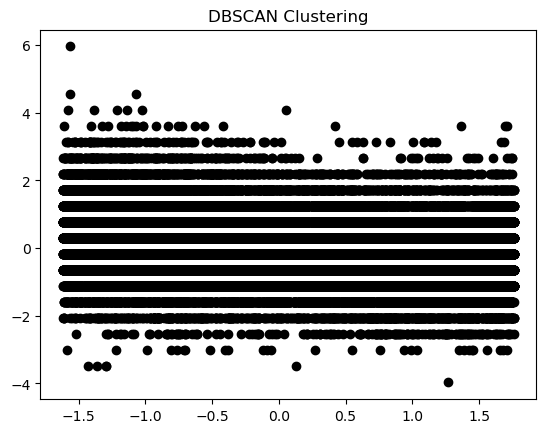

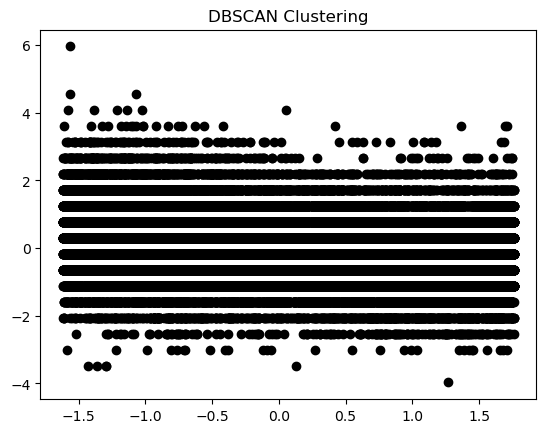

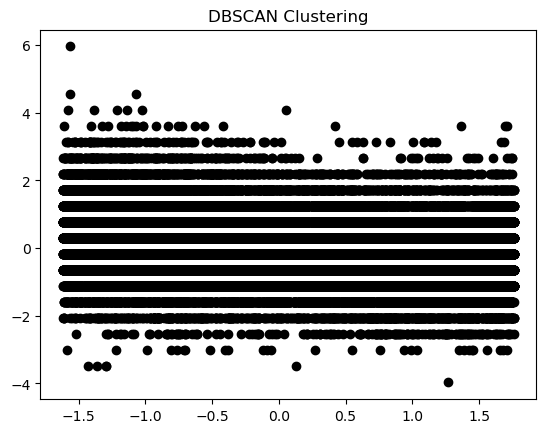

In [13]:
# 17

# Perform DBSCAN clustering with different parameter values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df1_std)
        

        # Extract cluster labels and core sample indices
        cluster_labels = dbscan.labels_
        core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True

        # Number of clusters in labels, ignoring noise if present
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        # Plot the clusters
        unique_labels = set(cluster_labels)
        colors = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (cluster_labels == k)

            xy = df1_std[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=14)

            xy = df1_std[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=6)

        plt.title('DBSCAN Clustering')
        plt.show()

___
<a href="#top">Back to Top</a>
<a id="OptionB"></a>

Option B: Association Rule Mining

    Create frequent itemsets and association rules.

    Use tables/visualization to discuss the found results.

    Use several measure for evaluating how interesting different rules are.

    Describe your results. What findings are the most compelling and why?

In [ ]:
# 18

# Using R

# # Load the data
# data <- df1_std

# # Create an association rules object
# arules <- apriori(data, minlen = 2, supp = 0.01, conf = 0.5)

# # Get the top 10 association rules
# top_rules <- arules[1:10]

# # Print the top 10 association rules
# print(top_rules)

NameError: name 'data' is not defined

___
<a href="#top">Back to Top</a>
<a id="OptionC"></a>

Option C: Collaborative Filtering

    Create user-item matrices or item-item matrices using collaborative filtering

    Determine performance of the recommendations using different performance measures
    and explain what each measure

    Use tables/visualization to discuss the found results. Explain each visualization in detail.

    Describe your results. What findings are the most compelling and why?

In [ ]:
# 19

# Create a user-item matrix
user_item_matrix = df1_std.pivot_table(values='rating', index='user_id', column='item_id', aggfunc='mean')

# Create a recommender system
recommender = gl.recommender.create(user_item_matrix, k=10)

# Get the top 10 recommendations for a user
recommendations = recommender.recommend(user_id=1, k=10)

# Print the top 10 recommendations
print(recommendations)

___
___
<a href="#top">Back to Top</a>
<a id="Deployment"></a>
## Deployment (10 points total)
    Be critical of your performance and tell the reader how you current model might be usable by
    other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

    How useful is your model for interested parties (i.e., the companies or organizations
    that might want to use it)?

    How would your deploy your model for interested parties?

    What other data should be collected?

    How often would the model need to be updated, etc.?

___
___
<a href="#top">Back to Top</a>
<a id="Exceptional"></a>
## Exceptional Work (10 points total)
    You have free reign to provide additional analyses or combine analyses